<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/ML-Practice/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## In the linear regression assignment, you were not able to take care of the multicollinearity. Use principal component analysis to come up with linearly uncorrelated variables and run linear regression with regularization with these new features. You can experiment around with different degrees of variance you want to retain in the data.</b>

In [212]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [213]:
df=pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/ML-Practice/main/Data/boston_housing.csv')

In [214]:
collumn_name=df.columns.to_list()

In [215]:
df.rename(columns={collumn_name[0]:"collumnname"},inplace=True)

In [216]:
df=df['collumnname'].str.split(expand=True)

In [217]:
entries_list=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
case_list = []
for i,entry  in enumerate(entries_list):
    case = {i: entry }
    case_list.append(case)

In [218]:
for i in case_list:
  df.rename(columns=i,inplace=True)

In [219]:
df=df.astype('float')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    float64
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    float64
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [221]:
# creating a function to check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  '''
  returns the vif of the given data 
  '''

  # creating a data frame
  vif = pd.DataFrame()
  # storing the columns names for the data  
  vif["variables"] = X.columns
  # Calculating VIF
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  #  returing the vif dataframe
  return(vif)

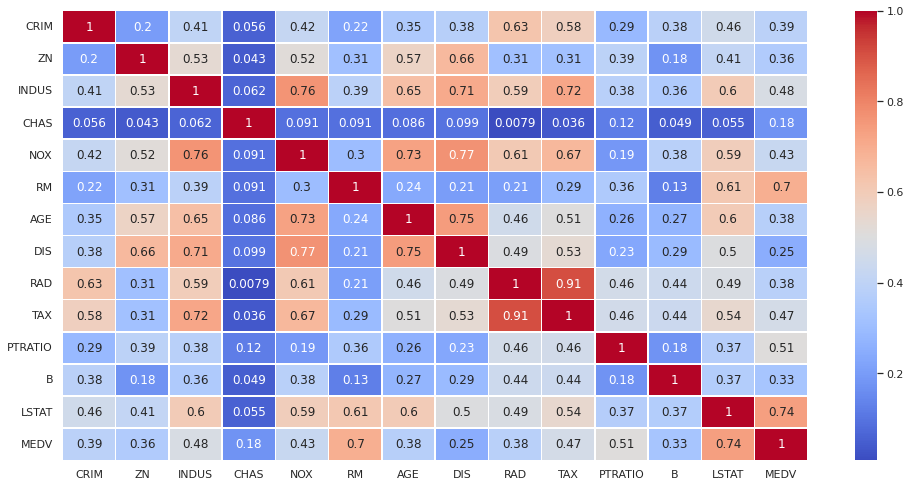

In [222]:
sns.heatmap(data=abs(df.corr()), annot=True, cmap='coolwarm',linewidths=.5)

In [223]:
# calcuationg vif of independent variables
calc_vif(df[[i for i in df.describe().columns if i in ['INDUS','NOX','RM','TAX','PTRATIO','LSTAT'] ]])

,variables,VIF
0,INDUS,11.547972
1,NOX,61.419224
2,RM,58.195916
3,TAX,16.671996
4,PTRATIO,57.522840
5,LSTAT,9.364098


In [224]:
X=df[['INDUS','NOX','RM','TAX','PTRATIO','LSTAT']]
y=df['MEDV']

In [225]:
def adj_r2_score(r2_score,y_pred):
  #finding the adjusted r2 score
  adj_r2 = 1 - (1-r2_score)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  # printing the adjusted r2 score
  return adj_r2

In [226]:
def model_df(model):

  # empty list for adding scores
  var_ratio_list=[]
  A_r2_train=[]
  A_r2_test=[]

  for i in range(1,7,1):

    # initilizing pca with n components 
    pca=PCA(n_components=i)
    pca.fit(X)
    X_pca=pca.transform(X)

    # finding the reduction in variance
    var_ratio=np.sum(pca.explained_variance_ratio_)
    var_ratio_list.append(var_ratio)

    X_train,X_test,y_train,y_test=train_test_split(X_pca,y,train_size=0.25,random_state=0)

    # scaling the variables
    scaler = MinMaxScaler()
    X_train_lr = scaler.fit_transform(X_train)
    X_test_lr = scaler.transform(X_test)

    # training the model 
    model.fit(X_train_lr,y_train)
    y_pred_test=model.predict(X_test_lr)
    y_pred_train=model.predict(X_train_lr)

    # calculating the scores 
    adj_r2_train=adj_r2_score(r2_score(y_train,y_pred_train),y_pred_train)
    adj_r2_test=adj_r2_score(r2_score(y_test,y_pred_test),y_pred_test)
    A_r2_train.append(adj_r2_train)
    A_r2_test.append(adj_r2_test)

  #creating dictionary to store all the metrices 
  dict={'A_r2_train':A_r2_train,'A_r2_test':A_r2_test,'var_ratio':var_ratio_list}
  # list of all models
  model_name=[list(range(1,7,1))]
  # converting dictionary to dataframe
  matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)  
  # taking the transpose of the dataframe to make it more visual appealing
  matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})
  return (matrix_df)


# linear reg

In [227]:
regression=LinearRegression()
model_df(regression)

,level_0,A_r2_train,A_r2_test,var_ratio
0,1,0.218988,0.188745,0.997806
1,2,0.538132,0.486294,0.999269
2,3,0.568704,0.525783,0.999864
3,4,0.634265,0.568859,0.999990
4,5,0.723608,0.622976,1.000000
5,6,0.723837,0.623164,1.000000


### Lasso 

In [228]:
from sklearn.model_selection import GridSearchCV

In [229]:
# importing the Lasso regularization model
from sklearn.linear_model import Lasso

In [230]:
# creating lasso regularization model
lasso = Lasso(alpha=0.001)
#setting the parameters of the 
parameters = {'alpha': [1e-3,1e-2,1e-1,1,10,100]}
lasso_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5,n_jobs=-1,verbose=0)

In [231]:
# training and evaluating the model
model_df(lasso_grid)

,level_0,A_r2_train,A_r2_test,var_ratio
0,1,0.218988,0.188764,0.997806
1,2,0.538096,0.487826,0.999269
2,3,0.568633,0.527207,0.999864
3,4,0.634169,0.571468,0.999990
4,5,0.723480,0.626927,1.000000
5,6,0.723676,0.627117,1.000000


In [232]:
lasso_grid.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

###Ridge 

In [233]:
# importing the Lasso regularization model
from sklearn.linear_model import Ridge

In [234]:
# creating ridge regularization model
ridge = Ridge()
# finding the best parameters for ridge by gridsearchcv
parameters = {'alpha': [1e-3,1e-2,1e-1,1,10,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5,n_jobs=-1,verbose=0)

In [235]:
# training and evaluating the ridge_regressor
model_df(ridge_regressor)

,level_0,A_r2_train,A_r2_test,var_ratio
0,1,0.218988,0.188747,0.997806
1,2,0.537966,0.489428,0.999269
2,3,0.568521,0.528649,0.999864
3,4,0.634047,0.573305,0.999990
4,5,0.723338,0.628768,1.000000
5,6,0.723566,0.628993,1.000000


In [236]:
ridge_regressor.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)